**Model Training**

**Import Data and Required Packages**

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

import warnings

**Import the CSV Data using Pandas DataFrame**

In [7]:
df = pd.read_csv('data/Student_Performance_dataset.csv')

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


**Show Top 5 Records**

In [9]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [10]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


**Preparing 'X' and 'Y' variables**


1.   Preparing 'X' Varibale



In [11]:
X = df.drop(columns=['Performance Index'],axis=1)

In [12]:
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5


In [13]:
print("Categories in 'Hours Studied' variable:     ",end=" " )
print(df['Hours Studied'].unique())

print("Categories in 'Previous Scores' variable:  ",end=" ")
print(df['Previous Scores'].unique())

print("Categories in'Extracurricular Activities' variable:",end=" " )
print(df['Extracurricular Activities'].unique())

print("Categories in 'Sleep Hours' variable:     ",end=" " )
print(df['Sleep Hours'].unique())

print("Categories in 'Sample Question Papers Practiced' variable:     ",end=" " )
print(df['Sample Question Papers Practiced'].unique())

Categories in 'Hours Studied' variable:      [7 4 8 5 3 6 2 1 9]
Categories in 'Previous Scores' variable:   [99 82 51 52 75 78 73 45 77 89 91 79 47 72 83 54 96 74 85 61 62 84 94 90
 44 70 67 97 59 55 68 63 46 76 43 81 93 98 48 92 64 88 60 87 40 69 80 95
 49 50 53 71 56 58 66 65 57 41 42 86]
Categories in'Extracurricular Activities' variable: ['Yes' 'No']
Categories in 'Sleep Hours' variable:      [9 4 7 5 8 6]
Categories in 'Sample Question Papers Practiced' variable:      [1 2 5 6 0 8 3 4 9 7]


2. Preparing 'Y' Variable

In [14]:
y = df['Performance Index']

In [15]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [16]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [17]:
X = preprocessor.fit_transform(X)

In [18]:
X.shape

(10000, 6)

In [19]:
# Separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((8000, 6), (2000, 6))

**Create an Evaluate Function to give all metrics after model Training**

In [20]:
#Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('---------------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*45)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.0408
- Mean Absolute Error: 1.6160
- R2 Score: 0.9889
---------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0282
- Mean Absolute Error: 1.6253
- R2 Score: 0.9880


Ridge Regression
Model performance for Training set
- Root Mean Squared Error: 2.0406
- Mean Absolute Error: 1.6162
- R2 Score: 0.9889
---------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.0262
- Mean Absolute Error: 1.6229
- R2 Score: 0.9881


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.9622
- Mean Absolute Error: 0.7438
- R2 Score: 0.9975
---------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.3206
- Mean Absolute Error: 1.8491
- R2 Score: 0.9844


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.4282
- Mean Abs

**Displaying Results**

In [22]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge Regression,0.988069
0,Linear Regression,0.988046
5,XGBRegressor,0.985605
2,Random Forest Regressor,0.984350
3,K-Neighbors Regressor,0.975658
4,Decision Tree,0.973972


**Linear Regression Model**

In [23]:
linear_model = LinearRegression()
linear_model = linear_model.fit(X_train, y_train)
linear_y_predict = linear_model.predict(X_test)
score = r2_score(y_test, linear_y_predict)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.80


**Scatter Plot of linear_y_pred (Predicted Value) and y_test (Actual Value) in Linear Regression**

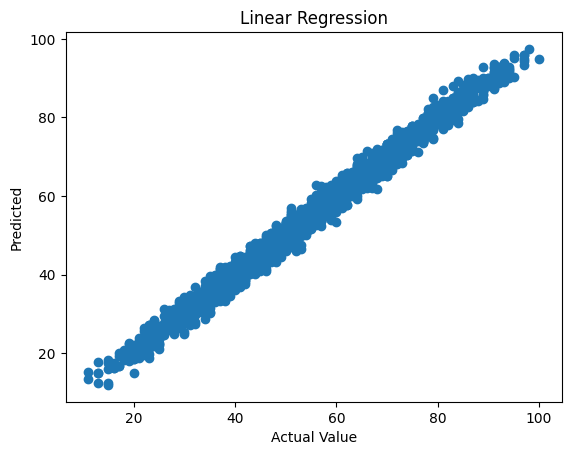

In [24]:
plt.scatter(y_test, linear_y_predict);
plt.title("Linear Regression")
plt.xlabel('Actual Value');
plt.ylabel('Predicted');

In [27]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

**Regression Plot For Linear Regression**

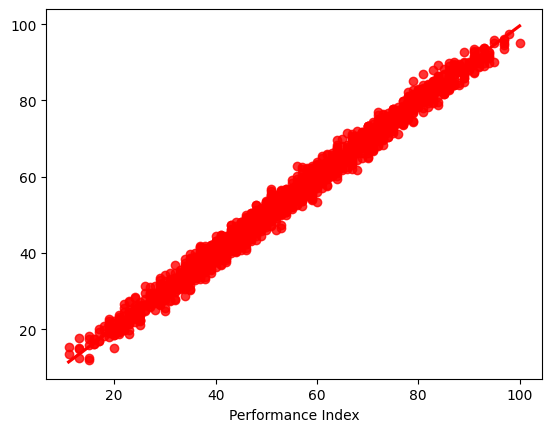

In [26]:
sns.regplot(x=y_test,y=linear_y_predict,ci=None,color ='red');

**Difference between Actual and Predicted Values in Linear Regression**

In [28]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':linear_y_predict,'Difference':y_test-linear_y_predict})
pred_df

,Actual Value,Predicted Value,Difference
9394,53.0,50.424316,2.575684
898,50.0,53.066650,-3.066650
2398,80.0,78.217285,1.782715
5906,24.0,25.419922,-1.419922
2343,64.0,67.373291,-3.373291
...,...,...,...
1037,91.0,90.672119,0.327881
2899,42.0,41.748535,0.251465
9549,66.0,64.596191,1.403809
2740,27.0,25.870605,1.129395


**Ridge Regression**

In [29]:
ridge_model = Ridge()
ridge_model = ridge_model.fit(X_train, y_train)
ridge_y_predict = ridge_model.predict(X_test)
score = r2_score(y_test, ridge_y_predict)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.81


**Plot ridge_y_pred (Predicted Value) and y_test (Actual Value) in Ridge Regression**

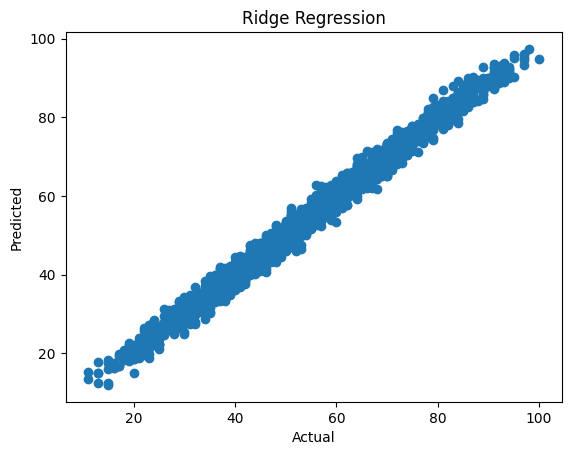

In [30]:
plt.scatter(y_test,ridge_y_predict);
plt.title("Ridge Regression")
plt.xlabel('Actual');
plt.ylabel('Predicted');

**Regression Plot For Ridge Regression**

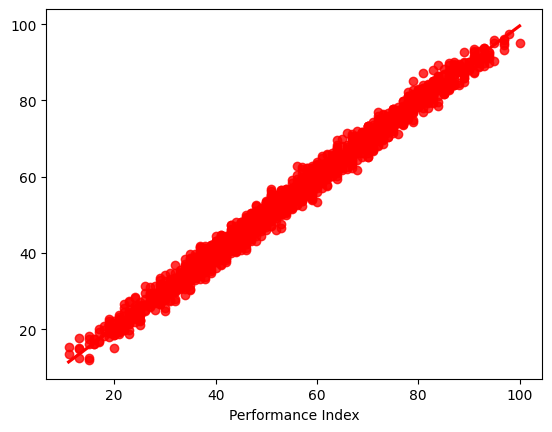

In [31]:
sns.regplot(x=y_test,y=ridge_y_predict,ci=None,color ='red');

**Difference between Actual and Predicted Values in Ridge Regression**

In [32]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':ridge_y_predict,'Difference':y_test-ridge_y_predict})
pred_df

,Actual Value,Predicted Value,Difference
9394,53.0,50.451909,2.548091
898,50.0,53.094004,-3.094004
2398,80.0,78.242153,1.757847
5906,24.0,25.395488,-1.395488
2343,64.0,67.399198,-3.399198
...,...,...,...
1037,91.0,90.695315,0.304685
2899,42.0,41.722070,0.277930
9549,66.0,64.567510,1.432490
2740,27.0,25.900850,1.099150


**Random Forest**

In [33]:
random_forest_model = RandomForestRegressor()
random_forest_model = random_forest_model.fit(X_train, y_train)
random_y_predict = random_forest_model.predict(X_test)
score = r2_score(y_test, random_y_predict)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.43


**Plot random_y_pred (Predicted Value) and y_test (Actual Value) in Random Forest**

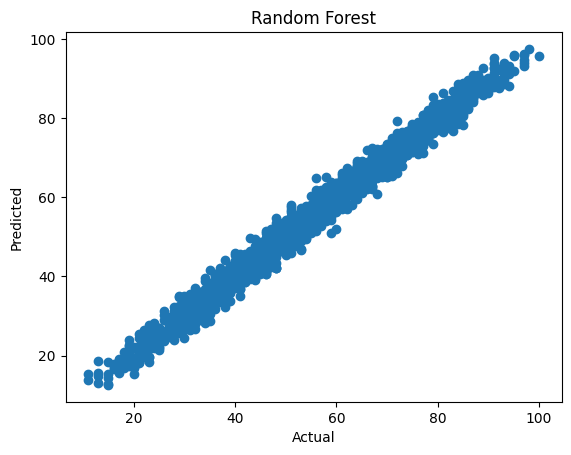

In [34]:
plt.scatter(y_test,random_y_predict);
plt.title("Random Forest")
plt.xlabel('Actual');
plt.ylabel('Predicted');

**Regression Plot For Random Forest**

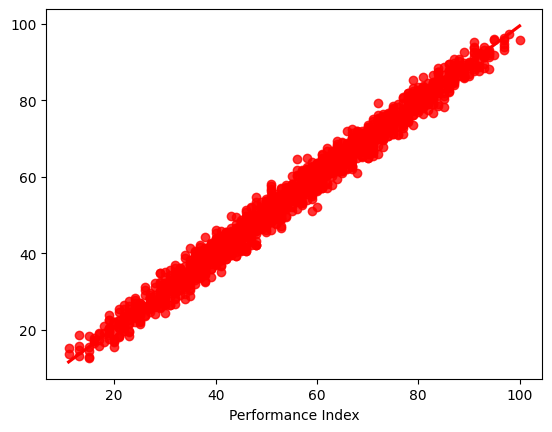

In [35]:
sns.regplot(x=y_test,y=random_y_predict,ci=None,color ='red');

**Difference between Actual and Predicted Values in Random Forest**

In [36]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':random_y_predict,'Difference':y_test-random_y_predict})
pred_df

,Actual Value,Predicted Value,Difference
9394,53.0,49.550000,3.450000
898,50.0,53.793333,-3.793333
2398,80.0,77.613167,2.386833
5906,24.0,25.460000,-1.460000
2343,64.0,67.943333,-3.943333
...,...,...,...
1037,91.0,92.520000,-1.520000
2899,42.0,41.738667,0.261333
9549,66.0,63.845000,2.155000
2740,27.0,25.374500,1.625500


**Comparison**

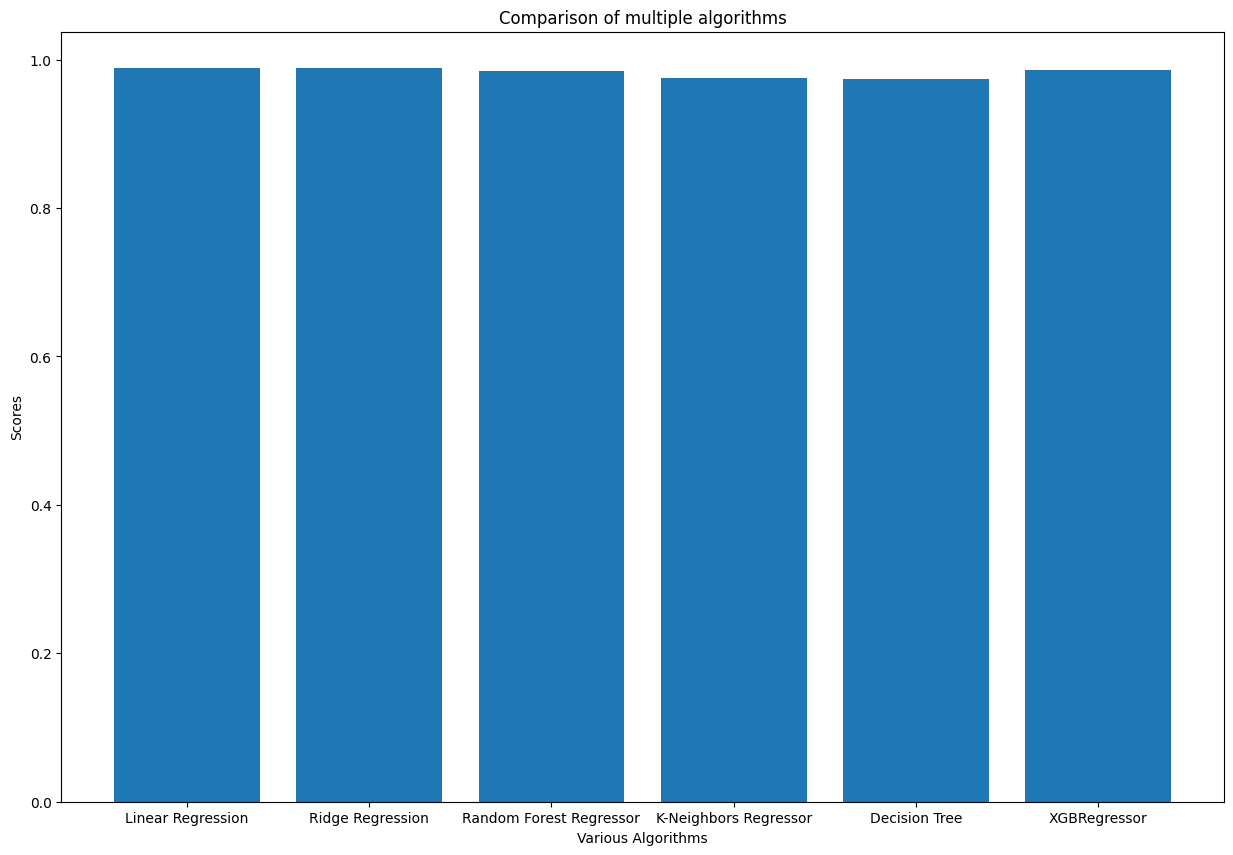

In [37]:
plt.figure(figsize=(15,10))
plt.bar(model_list, r2_list)
plt.xlabel("Various Algorithms")
plt.ylabel("Scores")
plt.title("Comparison of multiple algorithms")
plt.show()
